In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

In [2]:
%pwd

'/home/lawrence/homework_fall2021/hw3'

# Q-Learning
## Experiment 1: basic Q-learning

In [3]:
# Basic DQN on MsPacman-v0
ea_q1 = event_accumulator.EventAccumulator('data/q1_MsPacman-v0_17-10-2021_18-47-00/events.out.tfevents.1634521621.triton2')
ea_q1 = ea_q1.Reload()
ea_list = [ea_q1]
ea_q1.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Train_AverageReturn',
  'Train_BestReturn',
  'Training_Loss'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [4]:
def get_summary_df(ea):
    result = pd.DataFrame(ea.Scalars('Train_AverageReturn'))
    result = result.rename(columns={"value": "Train_AverageReturn"})
    result['Train_BestReturn'] = [result.Train_AverageReturn[0]] + [e.value for e in ea.Scalars('Train_BestReturn')]
#     result['Train_AverageReturn'] = [e.value for e in ea.Scalars('Train_AverageReturn')]    
#     result['Train_BestReturn'] = [e.value for e in ea.Scalars('Train_BestReturn')]
    return result

In [5]:
result = get_summary_df(ea_q1)
result

,wall_time,step,Train_AverageReturn,Train_BestReturn
0,1.634522e+09,10001,401.639343,401.639343
1,1.634522e+09,20001,435.700012,435.700012
2,1.634522e+09,30001,432.100006,435.700012
3,1.634522e+09,40001,439.399994,439.399994
4,1.634522e+09,50001,458.899994,458.899994
...,...,...,...,...
477,1.634556e+09,4780001,1768.699951,1884.599976
478,1.634556e+09,4790001,1693.300049,1884.599976
479,1.634556e+09,4800001,1710.599976,1884.599976
480,1.634556e+09,4810001,1730.900024,1884.599976


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


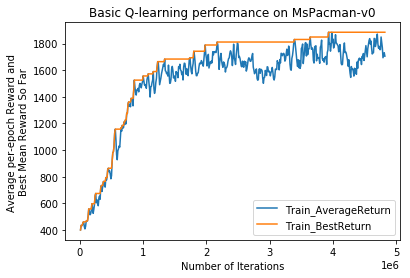

In [6]:
fig = plt.figure()

plt.plot(result.step, result.Train_AverageReturn, linestyle='-', label = 'Train_AverageReturn')
plt.plot(result.step, result.Train_BestReturn, linestyle='-', label = 'Train_BestReturn')
plt.legend(loc='lower right')
plt.title('Basic Q-learning performance on MsPacman-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Average per-epoch Reward and \nBest Mean Reward So Far')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

## Experiment 2: Double Q-learning

In [7]:
# Double DQN on LunarLander-v3
ea_q2_doubledqn_1 = event_accumulator.EventAccumulator('data/q2_doubledqn_1_LunarLander-v3_17-10-2021_18-50-07/events.out.tfevents.1634521807.triton2')
ea_q2_doubledqn_2 = event_accumulator.EventAccumulator('data/q2_doubledqn_2_LunarLander-v3_17-10-2021_18-50-33/events.out.tfevents.1634521833.triton2')
ea_q2_doubledqn_3 = event_accumulator.EventAccumulator('data/q2_doubledqn_3_LunarLander-v3_17-10-2021_18-51-12/events.out.tfevents.1634521872.triton2')
ea_q2_dqn_1 = event_accumulator.EventAccumulator('data/q2_dqn_1_LunarLander-v3_17-10-2021_18-47-54/events.out.tfevents.1634521674.triton2')
ea_q2_dqn_2 = event_accumulator.EventAccumulator('data/q2_dqn_2_LunarLander-v3_17-10-2021_18-48-29/events.out.tfevents.1634521709.triton2')
ea_q2_dqn_3 = event_accumulator.EventAccumulator('data/q2_dqn_3_LunarLander-v3_17-10-2021_18-48-51/events.out.tfevents.1634521731.triton2')
ea_list = [ea_q2_dqn_1, ea_q2_dqn_2, ea_q2_dqn_3, ea_q2_doubledqn_1, ea_q2_doubledqn_2, ea_q2_doubledqn_3]
ea_list = [ea.Reload() for ea in ea_list]
ea_q2_doubledqn_1.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Train_AverageReturn',
  'Training_Loss',
  'Train_BestReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [8]:
result_list = list(map(get_summary_df, ea_list))
avg_result_dqn = result_list[0].iloc[:,:2]
avg_result_dqn['Train_AverageReturn_avg'] = (result_list[0]['Train_AverageReturn'] + result_list[1]['Train_AverageReturn'] + result_list[2]['Train_AverageReturn'])/3
display(avg_result_dqn)
avg_result_doubledqn = result_list[3].iloc[:,:2]
avg_result_doubledqn['Train_AverageReturn_avg'] = (result_list[3]['Train_AverageReturn'] + result_list[4]['Train_AverageReturn'] + result_list[5]['Train_AverageReturn'])/3
display(avg_result_doubledqn)

,wall_time,step,Train_AverageReturn_avg
0,1.634522e+09,10001,-240.199763
1,1.634522e+09,20001,-189.621709
2,1.634522e+09,30001,-164.967143
3,1.634522e+09,40001,-149.566132
4,1.634522e+09,50001,-141.725749
5,1.634522e+09,60001,-130.997953
6,1.634522e+09,70001,-109.111348
7,1.634522e+09,80001,-94.614400
8,1.634522e+09,90001,-76.026104
9,1.634522e+09,100001,-64.201819


,wall_time,step,Train_AverageReturn_avg
0,1.634522e+09,10001,-258.594854
1,1.634522e+09,20001,-213.531067
2,1.634522e+09,30001,-191.213669
3,1.634522e+09,40001,-169.943192
4,1.634522e+09,50001,-153.475403
5,1.634522e+09,60001,-138.300629
6,1.634522e+09,70001,-120.120519
7,1.634522e+09,80001,-102.036662
8,1.634522e+09,90001,-83.941404
9,1.634522e+09,100001,-72.601419


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


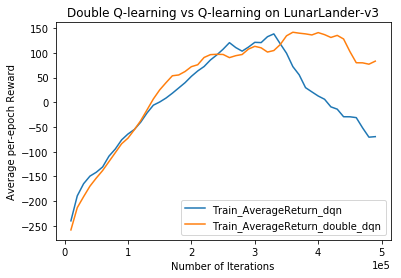

In [9]:
fig = plt.figure()
plt.plot(avg_result_dqn.step, avg_result_dqn.Train_AverageReturn_avg, linestyle='-', label = 'Train_AverageReturn_dqn')
plt.plot(avg_result_doubledqn.step, avg_result_doubledqn.Train_AverageReturn_avg, linestyle='-', label = 'Train_AverageReturn_double_dqn')
plt.legend(loc='lower right')
plt.title('Double Q-learning vs Q-learning on LunarLander-v3')
plt.xlabel('Number of Iterations')
plt.ylabel('Average per-epoch Reward')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

## Experiment 3: Experimenting with Hyperparameters

In [10]:
# DQN on LunarLander-v3 with different lander_exploration_schedule
ea_q2_dqn_1 = event_accumulator.EventAccumulator('data/q2_dqn_1_LunarLander-v3_17-10-2021_18-47-54/events.out.tfevents.1634521674.triton2')
ea_q3_hparam1 = event_accumulator.EventAccumulator('data/q3_hparam1_LunarLander-v3_17-10-2021_22-16-31/events.out.tfevents.1634534191.triton2')
ea_q3_hparam2 = event_accumulator.EventAccumulator('data/q3_hparam2_LunarLander-v3_17-10-2021_22-17-09/events.out.tfevents.1634534229.triton2')
ea_q3_hparam3 = event_accumulator.EventAccumulator('data/q3_hparam3_LunarLander-v3_17-10-2021_22-17-45/events.out.tfevents.1634534265.triton2')
ea_list = [ea_q2_dqn_1, ea_q3_hparam1, ea_q3_hparam2, ea_q3_hparam3]
ea_list = [ea.Reload() for ea in ea_list]
ea_q2_dqn_1.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Train_AverageReturn',
  'Training_Loss',
  'Train_BestReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [11]:
result_list = list(map(get_summary_df, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Train_AverageReturn,Train_BestReturn
0,1.634522e+09,10001,-229.316574,-229.316574
1,1.634522e+09,20001,-181.384949,-181.384949
2,1.634522e+09,30001,-157.468155,-157.468155
3,1.634522e+09,40001,-148.635361,-148.635361
4,1.634522e+09,50001,-137.359070,-137.359070
5,1.634522e+09,60001,-122.642586,-122.642586
6,1.634522e+09,70001,-100.186485,-100.186485
7,1.634522e+09,80001,-80.291061,-80.291061
8,1.634522e+09,90001,-59.369457,-59.369457
9,1.634522e+09,100001,-41.488850,-41.488850


,wall_time,step,Train_AverageReturn,Train_BestReturn
0,1.634534e+09,10001,-234.418884,-234.418884
1,1.634534e+09,20001,-183.197403,-183.197403
2,1.634534e+09,30001,-160.990143,-160.990143
3,1.634534e+09,40001,-141.112427,-141.112427
4,1.634534e+09,50001,-130.265686,-130.265686
5,1.634534e+09,60001,-120.472809,-120.472809
6,1.634534e+09,70001,-104.949165,-104.949165
7,1.634535e+09,80001,-91.871651,-91.871651
8,1.634535e+09,90001,-76.357605,-76.357605
9,1.634535e+09,100001,-74.244209,-74.244209


,wall_time,step,Train_AverageReturn,Train_BestReturn
0,1.634534e+09,10001,-228.494049,-228.494049
1,1.634534e+09,20001,-188.499939,-188.499939
2,1.634534e+09,30001,-152.526001,-152.526001
3,1.634534e+09,40001,-137.367386,-137.367386
4,1.634534e+09,50001,-128.218430,-128.218430
5,1.634534e+09,60001,-124.617744,-124.617744
6,1.634535e+09,70001,-102.201500,-102.201500
7,1.634535e+09,80001,-99.400375,-99.400375
8,1.634535e+09,90001,-94.953728,-94.953728
9,1.634535e+09,100001,-72.416702,-72.416702


,wall_time,step,Train_AverageReturn,Train_BestReturn
0,1.634534e+09,10001,-234.676987,-234.676987
1,1.634534e+09,20001,-190.953033,-190.953033
2,1.634534e+09,30001,-151.311371,-151.311371
3,1.634534e+09,40001,-123.571930,-123.571930
4,1.634534e+09,50001,-115.939919,-115.939919
5,1.634534e+09,60001,-109.685364,-109.685364
6,1.634535e+09,70001,-98.903618,-98.903618
7,1.634535e+09,80001,-84.235809,-84.235809
8,1.634535e+09,90001,-65.981956,-65.981956
9,1.634535e+09,100001,-28.767046,-28.767046


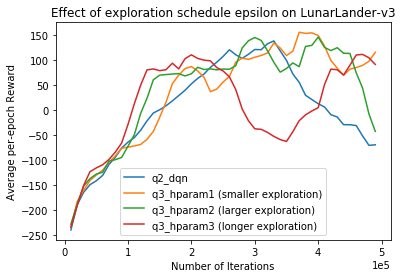

In [17]:
labels_list = ['q2_dqn_1', 'q3_hparam1 (smaller exploration)', 'q3_hparam2 (larger exploration)', 'q3_hparam3 (longer exploration)']
fig = plt.figure()
plt.plot(avg_result_dqn.step, avg_result_dqn.Train_AverageReturn_avg, linestyle='-', label = 'q2_dqn')
for i in range(1,4):
    plt.plot(result_list[i].step, result_list[i].Train_AverageReturn, linestyle='-', label = labels_list[i])
plt.legend(loc='lower center')
plt.title('Effect of exploration schedule epsilon on LunarLander-v3')
plt.xlabel('Number of Iterations')
plt.ylabel('Average per-epoch Reward')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

# Actor-Critic
## Experiment 4: Sanity check with Cartpole

In [19]:
# Actor-Critic on CartPole-v0 with different num_target_updates and num_grad_steps_per_target_update
ea_q4_1_100 = event_accumulator.EventAccumulator('data/q4_1_100_CartPole-v0_20-10-2021_21-17-34/events.out.tfevents.1634789854.triton2')
ea_q4_10_10 = event_accumulator.EventAccumulator('data/q4_10_10_CartPole-v0_20-10-2021_21-17-55/events.out.tfevents.1634789875.triton2')
ea_q4_100_1 = event_accumulator.EventAccumulator('data/q4_100_1_CartPole-v0_20-10-2021_21-17-12/events.out.tfevents.1634789832.triton2')
ea_q4_ac_1_1 = event_accumulator.EventAccumulator('data/q4_ac_1_1_CartPole-v0_20-10-2021_21-16-27/events.out.tfevents.1634789787.triton2')
ea_list = [ea_q4_ac_1_1, ea_q4_100_1, ea_q4_1_100, ea_q4_10_10]
ea_list = [ea.Reload() for ea in ea_list]
ea_q4_1_100.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Critic_Loss',
  'Actor_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [20]:
def get_summary_df_ac(ea):
    result = pd.DataFrame(ea.Scalars('Eval_AverageReturn'))
    result = result.rename(columns={"value": "Eval_AverageReturn"})
    result['Eval_StdReturn'] = [e.value for e in ea.Scalars('Eval_StdReturn')]
    result['Train_AverageReturn'] = [e.value for e in ea.Scalars('Train_AverageReturn')]
    return result

In [22]:
result_list = list(map(get_summary_df_ac, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.634790e+09,0,25.235294,11.694793,27.648649
1,1.634790e+09,10,10.150000,1.314344,10.860215
2,1.634790e+09,20,12.117647,1.450450,11.627907
3,1.634790e+09,30,13.333333,1.639783,13.386666
4,1.634790e+09,40,12.625000,1.798437,13.025974
5,1.634790e+09,50,11.194445,1.370714,11.755814
6,1.634790e+09,60,10.125000,1.122219,10.101010
7,1.634790e+09,70,10.552631,1.092977,10.468750
8,1.634790e+09,80,12.333333,1.717409,11.988095
9,1.634790e+09,90,33.583332,7.532798,32.000000


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.634790e+09,0,29.142857,21.346989,27.648649
1,1.634790e+09,10,110.250000,41.583500,71.428574
2,1.634790e+09,20,166.000000,26.280539,190.333328
3,1.634790e+09,30,200.000000,0.000000,200.000000
4,1.634790e+09,40,200.000000,0.000000,186.833328
5,1.634790e+09,50,140.333328,9.672413,144.285721
6,1.634790e+09,60,200.000000,0.000000,186.833328
7,1.634790e+09,70,128.000000,10.173495,135.125000
8,1.634790e+09,80,175.000000,11.430952,160.857147
9,1.634790e+09,90,199.333328,0.942809,191.000000


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.634790e+09,0,22.631578,13.955608,27.648649
1,1.634790e+09,10,50.555557,15.391997,60.176472
2,1.634790e+09,20,200.000000,0.000000,156.142853
3,1.634790e+09,30,137.000000,10.033278,134.750000
4,1.634790e+09,40,200.000000,0.000000,197.000000
5,1.634790e+09,50,200.000000,0.000000,200.000000
6,1.634790e+09,60,200.000000,0.000000,200.000000
7,1.634790e+09,70,200.000000,0.000000,200.000000
8,1.634790e+09,80,200.000000,0.000000,200.000000
9,1.634790e+09,90,200.000000,0.000000,200.000000


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.634790e+09,0,40.500000,44.757683,27.648649
1,1.634790e+09,10,158.000000,22.553640,103.800003
2,1.634790e+09,20,131.250000,6.219928,107.400002
3,1.634790e+09,30,125.000000,6.082763,121.333336
4,1.634790e+09,40,67.666664,18.098495,65.625000
5,1.634790e+09,50,200.000000,0.000000,200.000000
6,1.634790e+09,60,200.000000,0.000000,200.000000
7,1.634790e+09,70,200.000000,0.000000,200.000000
8,1.634790e+09,80,200.000000,0.000000,200.000000
9,1.634790e+09,90,200.000000,0.000000,200.000000


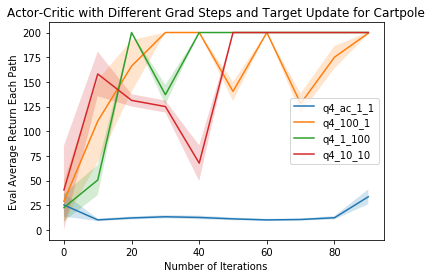

In [25]:
fig = plt.figure()
label_list = ['q4_ac_1_1', 'q4_100_1', 'q4_1_100', 'q4_10_10']
for i in range(4):
    result = result_list[i]
    plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[i])
    plt.fill_between(x=result.step, y1=np.maximum(result.Eval_AverageReturn-result.Eval_StdReturn, 0), 
                     y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend(loc='center right')
plt.title('Actor-Critic with Different Grad Steps and Target Update for Cartpole')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

num_target_updates = 1 per agent update and num_grad_steps_per_target_update = 100 (the green curve) seems to be the best

## Experiment 5: Run actor-critic with more difficult tasks

In [38]:
ea_q5_1_100_InvertedPendulum = event_accumulator.EventAccumulator('data/q5_1_100_InvertedPendulum-v2_20-10-2021_21-29-45/events.out.tfevents.1634790585.triton2')
ea_q5_1_100_InvertedPendulum = ea_q5_1_100_InvertedPendulum.Reload()
ea_q5_1_100_InvertedPendulum.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Critic_Loss',
  'Actor_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [39]:
result = get_summary_df_ac(ea_q5_1_100_InvertedPendulum)
result

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.634791e+09,0,10.282051,4.830187,8.510204
1,1.634791e+09,10,54.500000,9.937304,56.505619
2,1.634791e+09,20,103.000000,9.874208,136.864868
3,1.634791e+09,30,121.750000,37.797981,81.258064
4,1.634791e+09,40,217.500000,75.500000,114.000000
5,1.634791e+09,50,1000.000000,0.000000,456.363647
6,1.634791e+09,60,1000.000000,0.000000,1000.000000
7,1.634791e+09,70,1000.000000,0.000000,1000.000000
8,1.634791e+09,80,1000.000000,0.000000,838.166687
9,1.634791e+09,90,1000.000000,0.000000,1000.000000


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


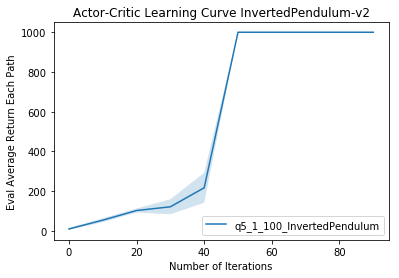

In [40]:
fig = plt.figure()
label_list = ['q5_1_100_InvertedPendulum']

plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[0])
plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                 y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend(loc='lower right')
plt.title('Actor-Critic Learning Curve InvertedPendulum-v2')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

In [41]:
ea_q5_1_100_HalfCheetah = event_accumulator.EventAccumulator('data/q5_1_100_HalfCheetah-v2_20-10-2021_21-31-04/events.out.tfevents.1634790664.triton2')
ea_q5_1_100_HalfCheetah = ea_q5_1_100_HalfCheetah.Reload()
ea_q5_1_100_HalfCheetah.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Critic_Loss',
  'Actor_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [42]:
result = get_summary_df_ac(ea_q5_1_100_HalfCheetah)
result

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.634791e+09,0,-91.952690,39.907192,-90.568916
1,1.634791e+09,1,-66.466324,34.654354,-79.505402
2,1.634791e+09,2,-58.175415,29.136446,-74.220772
3,1.634791e+09,3,-56.404137,30.229458,-68.691956
4,1.634791e+09,4,-57.525757,20.072477,-64.373192
...,...,...,...,...,...
145,1.634794e+09,145,114.317421,26.196949,121.750069
146,1.634794e+09,146,103.178101,27.434059,108.100876
147,1.634794e+09,147,110.989342,22.825687,106.154289
148,1.634794e+09,148,103.578773,15.131584,108.393631


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


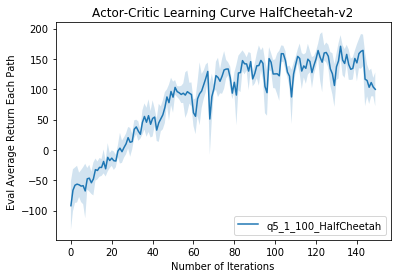

In [43]:
fig = plt.figure()
label_list = ['q5_1_100_HalfCheetah']

plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[0])
plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                 y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend(loc='lower right')
plt.title('Actor-Critic Learning Curve HalfCheetah-v2')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()